In [5]:
%matplotlib inline
import numpy as np

> 作者:	Fabian Pedregosa, Gael Varoquaux

**先决条件**

Numpy, Scipy

IPython

matplotlib

scikit-learn (http://scikit-learn.org)
![](http://scipy-lectures.github.io/_images/scikit-learn-logo.png)

**章节内容**

    加载样例数据集
        - 学习与预测
    分类
        - KNN分类器
        - 分类的支持向量机（SVMs）
    聚类：将观察值聚集在一起
        - K-means聚类
    使用主成分分析的降维
    把所有都放在一起：面孔识别
    线性模型：从回归到简约
        - 简约模型
    模型选择：选择预测器和参数
        - 网格搜索和交叉验证预测器
        
---
**警告**：从版本0.9（在2011年9月发布）起，scikit-learn导入路径从scikits.learn 改为 sklearn

---

## 3.5.1 加载样例数据集

![](http://scipy-lectures.github.io/_images/Virginia_Iris.png)

首先，我们将加载一些数据来玩玩。我们将使用的数据是知名的非常简单的花数据鸢尾花数据集。

我们有150个鸢尾花观察值指定了一些测量：花萼宽带、花萼长度、花瓣宽度和花瓣长度，以及对应的子类：Iris setosa、Iris versicolor和Iris virginica。

将数据集加载为Python对象：

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

这个数据存储在`.data`成员中，是一个 (n_samples, n_features) 数组。

In [2]:
iris.data.shape

(150, 4)

每个观察的类别存储在数据集的`.target`属性中。这是长度是n_samples的1D整型数组 :

In [3]:
iris.target.shape

(150,)

In [4]:
import numpy as np
np.unique(iris.target)

array([0, 1, 2])

---
数据重排的例子：digits 数据集
![](http://scipy-lectures.github.io/_images/digits_first_image.png)

digits 数据集包含1797 图像，每一个是8X8像素的图片，代表一个手写的数字

In [15]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

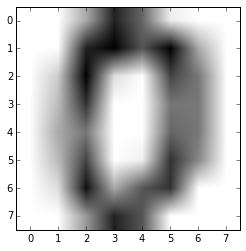

In [8]:
import pylab as pl
pl.imshow(digits.images[0], cmap=pl.cm.gray_r) 

要在scikit使用这个数据集，我们将每个8X8图片转化为一个长度为64的向量

In [9]:
data = digits.images.reshape((digits.images.shape[0], -1))

---
### 3.5.1.1 学习和预测

现在我们有了一些数据，我们想要从上面学习并且在新的数据做预测。在scikit-learn中，我们通过创建一个预测器，并调用他的 fit(X, Y) 方法从现有数据上学习。

In [11]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(iris.data, iris.target) # 从数据学习

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

一旦我们从数据中学习，我们可以用我们的模型来预测未见过的数据的最可能输出:

In [12]:
clf.predict([[ 5.0,  3.6,  1.3,  0.25]])

array([0])

---
**注意**：我们可以通过由下滑线结尾的属性来访问模型的参数:

---

In [13]:
clf.coef_

array([[ 0.18424728,  0.45122657, -0.80794162, -0.45070597],
       [ 0.05691797, -0.89245895,  0.39682582, -0.92882381],
       [-0.85072494, -0.98678239,  1.38091241,  1.86550868]])

## 3.5.2 分类
### 3.5.2.1 KNN分类器
![](http://scipy-lectures.github.io/_images/iris_knn.png)

可能最简单的分类器是最接近的邻居: 给定一个观察，使用在N维空间中训练样例中最接近它标签，这里N是每个样例的特征数。

K个最临近的邻居分类器内部使用基于ball tree的算法，用来代表训练的样例。

**KNN (K个最临近邻居) 分类的例子:**

In [14]:
# 创建并拟合一个最临近邻居分类器
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [15]:
knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

---

**训练集和测试集**

当用学习算法进行实验时，重要的一点是不要用拟合预测器的数据来测试预测器的预测力。实际上，我们通常会在测试集上得到准确的预测。

In [16]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]
knn.fit(iris.data[:100], iris.target[:100]) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [17]:
knn.score(iris.data[100:], iris.target[100:]) 

0.95999999999999996

额外的问题: 为什么我们使用随机排列?

---

### 3.5.2.2 分类的支持向量机 (SVMs)

#### 3.5.2.2.1 线性支持向量机

![](http://scipy-lectures.github.io/_images/svm_margin.png)

SVMs试图构建一个最大化两个类的间距的超平面。它选取输入的一个子集，称为支持向量，这个子集中的观察距离分隔超平面最近。

In [18]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris.data, iris.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

在scikit-learn实现了几种支持向量机。最常用的是`svm.SVC`、`svm.NuSVC` 和 `svm.LinearSVC`; “SVC” 代表支持向量分类器 (也存在用于回归的SVMs, 在scikit-learn被称为“SVR”)。

---

**练习**

在digits数据集上训练`svm.SVC`。留下最后的10%，在这些观察上测试预测的效果。

---

#### 3.5.2.2.2 使用核 (kernel)

类通常并不是都能用超平面分隔，因此，有一个不仅仅是线性也可能是多项式或者幂的决策函数是明智的 :

**线性核 (kernel)**
![](http://scipy-lectures.github.io/_images/svm_kernel_linear.png)

In [19]:
svc = svm.SVC(kernel='linear')

**多项式核 (kernel)**
![](http://scipy-lectures.github.io/_images/svm_kernel_poly.png)

In [20]:
svc = svm.SVC(kernel='poly', degree=3)
# degree: 多项式的阶

**RBF核 (kernel) (径向基核函数)**
![](http://scipy-lectures.github.io/_images/svm_kernel_rbf.png)

In [21]:
svc = svm.SVC(kernel='rbf')
# gamma: 径向基核大小的倒数

---

**练习**
以上列出的核哪一个在digits数据集上有较好的预测表现?

---

## 3.5.3 聚类 : 将观察值分组

以鸢尾花 (iris) 数据集为例，如果有三类鸢尾花，但是并不能访问他们标签，我们可以尝试**非观察学习** : 通过一些标准将观察**聚类**分入一些组。

### 3.5.3.1 K-means 聚类

最简单的聚类算法是k-means。这个算法将集合分成k个组，将每个观察值分配给一个组，以便使观察值 (在n维空间) 到组平均值的距离最小；然后重新计算平均数。循环进行这个操作直到组收敛，比如达到最大的`max_iter`循环次数。

(k-means的另一个实现在SciPy的`cluster`包中。`scikit-learn`实现的不同在于提供了一个对象API和一些额外的功能，包括智能初始化。)

In [2]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris.data) 

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [25]:
print k_means.labels_[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [26]:
print iris.target[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


**真实情况**

![](http://scipy-lectures.github.io/_images/cluster_iris_truth.png)
**K-means (3 组)**

![](http://scipy-lectures.github.io/_images/k_means_iris_3.png)
**K-means (8 组)**

![](http://scipy-lectures.github.io/_images/k_means_iris_8.png)

---
**在图像压缩中的应用**

聚类可以看做从信息中选取一组观察的方式。例如，这个技术可以被用来posterize一个图像 (将连续渐变色调转换为更少色调的一些区域):

In [5]:
from scipy import misc
lena = misc.lena().astype(np.float32)
X = lena.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X) 

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [6]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
lena_compressed = np.choose(labels, values)
lena_compressed.shape = lena.shape

源图片

![](http://scipy-lectures.github.io/_images/lena1.png)

K-means quantization

![](http://scipy-lectures.github.io/_images/lena_compressed.png)

## 3.5.4 使用主成分分析的降维

![](http://scipy-lectures.github.io/_images/pca_3d_axis.jpg)

![](http://scipy-lectures.github.io/_images/pca_3d_aligned.jpg)

上面观察展开的云点在一个方向非常平坦，因此，一个特征几乎可以准确用另两个特征来计算。PCA找到数据并不平坦的方向，并且可以通过投影到一个子空间中来减少维度。

---
**警告**: 根据你的scikit-learn版本，PCA将在模块`decomposition`或`pca`中。

---

In [3]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)

PCA(copy=True, n_components=2, whiten=False)

In [4]:
X = pca.transform(iris.data)

现在我们可视化（转换的）鸢尾花数据集:

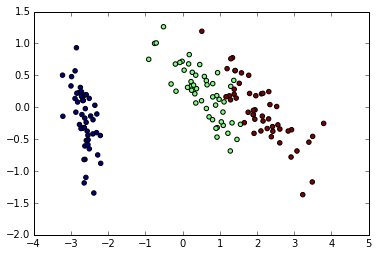

In [6]:
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target) 

PCA并不仅仅在高纬度数据集的可视化上有用。它也可以用于帮助加速对高维不太高效的有监督方法的预处理步骤。

## 3.5.5 把所有的东西放在一起: 面孔识别

展示使用主成分分析来降维和用执行向量机分类的面孔识别的例子。

![](http://scipy-lectures.github.io/_images/faces.png)

In [ ]:
"""
Stripped-down version of the face recognition example by Olivier Grisel

http://scikit-learn.org/dev/auto_examples/applications/face_recognition.html

## original shape of images: 50, 37
"""
import numpy as np
import pylab as pl
from sklearn import cross_val, datasets, decomposition, svm

# ..
# .. load data ..
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
perm = np.random.permutation(lfw_people.target.size)
lfw_people.data = lfw_people.data[perm]
lfw_people.target = lfw_people.target[perm]
faces = np.reshape(lfw_people.data, (lfw_people.target.shape[0], -1))
train, test = iter(cross_val.StratifiedKFold(lfw_people.target, k=4)).next()
X_train, X_test = faces[train], faces[test]
y_train, y_test = lfw_people.target[train], lfw_people.target[test]

# ..
# .. dimension reduction ..
pca = decomposition.RandomizedPCA(n_components=150, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# ..
# .. classification ..
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

# ..
# .. predict on new images ..
for i in range(10):
    print lfw_people.target_names[clf.predict(X_test_pca[i])[0]]
    _ = pl.imshow(X_test[i].reshape(50, 37), cmap=pl.cm.gray)
    _ = raw_input()

完整代码: [faces.py](http://scipy-lectures.github.io/_downloads/faces.py)

## 3.5.6 线性模型: 从回归到简约

**糖尿病数据集**
糖尿病数据集包含442个病人测量的10个生理学变量 (年龄、性别、体重、血压)，以及一个一年后病情发展的标记:

In [8]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

目前的任务是从生理学变量中预测疾病发生。

### 3.5.6.1 简约模型

要改善问题的条件 (信息量小的变量、减少高纬度的诅咒、作为一个特征预处理等等), 仅选择信息量大的特征，并且将没有信息量的特征设置为0将非常有趣。这种惩罚手段，称为**Lasso**, 可以将一些系数设置为0。这个方法称为**简约方法**，简约性可以看做是Occam剃刀的一个应用: 相比于复杂的模型更偏好简单的模型。

In [9]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=.3)
regr.fit(diabetes_X_train, diabetes_y_train) 

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
regr.coef_ # 非常简约的系数

array([   0.        ,   -0.        ,  497.34075682,  199.17441034,
         -0.        ,   -0.        , -118.89291545,    0.        ,
        430.9379595 ,    0.        ])

In [11]:
regr.score(diabetes_X_test, diabetes_y_test) 

0.55108354530029779

分数与线性回归 (最小二乘) 很相似:

In [12]:
lin = linear_model.LinearRegression()
lin.fit(diabetes_X_train, diabetes_y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lin.score(diabetes_X_test, diabetes_y_test) 

0.58507530226905713

**相同问题的不同算法**
不同的算法可以用于解决相同的数学问题。例如，*sklearn*中的Lasso对象用*坐标下降法*来解lasso回归，这种方法在大数据集上有效。但是，*sklearn*也提供了*LassoLARS*对象，使用*LARS*，一种在权重向量估计非常稀疏的问题上非常高效的方法，即有很少观察值的问题。

## 3.5.7 模型选择: 选择预测器及其参数

### 3.5.7.1 网格搜索和交叉验证预测器

#### 3.5.7.1.1 网格搜索

scikit-learn提供了一个对象，给定数据，计算预测器在一个参数网格的分数，并且选择可以最大化交叉验证分数的参数。这个对象用一个构建中的预测器并且暴露了一个预测器的探索集API:

In [16]:
from sklearn import svm, grid_search
gammas = np.logspace(-6, -1, 10)
svc = svm.SVC()
clf = grid_search.GridSearchCV(estimator=svc, param_grid=dict(gamma=gammas), n_jobs=-1)
clf.fit(digits.data[:1000], digits.target[:1000]) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [20]:
clf.best_score_

0.93200000000000005

In [22]:
clf.best_estimator_.gamma

0.00059948425031894088

默认，*GridSearchCV*使用三折交叉验证。但是，如果识别传递了一个分类器都不是一个回归器，它将使用一个分层三折。

#### 3.5.7.1.2 交叉验证预测器

一个算法一个算法为基础的设置参数来进行交叉验证更有效。这也就是为什么，对于一些预测器，scikit-learn暴露一个“CV”预测器, 这个预测器通过交叉验证自动设置他们的参数:

In [23]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [26]:
# 预测器自动选择他的lambda:
lasso.alpha_

0.012291895087486173

这些预测器与他们的对等物调用方式类似，只是在名字后面增加了‘CV’。

---
**练习**
在糖尿病数据集中，找到最优化的正则化参数alpha。

---